In [2]:
# Can get realitve import to work
#from .. import project_functions # This is called a relative import
#df = project_functions.load_and_process(url_or_path_to_csv_file)
#df



import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def load_and_process(data):
    df = pd.read_csv(data)
    blueTeam = (
        df.query('blueWins == 1').assign(
            KDA = lambda x: x['blueKills'] + x['blueAssists']/x['blueDeaths'],
            losingTeamKDA = lambda x: x['blueKills'] + x['blueAssists']/x['blueDeaths']
            ).rename(columns={"blueWardsPlaced":"wardsPlaced","blueWardsDestroyed":"wardsDestroyed","redWardsPlaced":"losingTeamWardsPlaced","redWardsDestroyed":"losingTeamWardsDestroyed",
                     "blueKills":"kills", "blueDeaths":"deaths","blueKDA":"KDA", "blueDragons":"dragonsTaken",
                     "blueAssits":"assits","blueEliteMonsters":"eliteMonsters", "blueHeralds":"heraldsTaken","blueTower":"towersTaken","blueTotalGold":"totalGold","blueAvgLevel":"avgLevel","blueTotalMinionsKilled":"totalMinionsKilled",
                     "blueGoldDiff":"goldDiff","blueCSPerMin":"csPerMin","redTowersDestoryed":"losingTeamTowersDestoried","blueTowersDestoried":'towerDestoried',
                      "blueAssits":"assists","blueExperienceDiff":"experienceDiff","redGoldPerMin":"losingTeamGoldPerMin","blueTowersDestroyed":"towersLost"
                    ,"blueTotalExperience":"totalExperience","blueFirstBlood":"firstBlood","redFirstBlood":"losingTeamFirstBlood","blueAssists":"assists","redAssists":"losingTeamAssits","blueGoldPerMin":"goldPerMin",
                    "blueTotalJungleMinionsKilled":"totalJungleMinionsKilled", "redTotalJungleMinionsKilled":"losingTeamTotalJungleMinionsKilled","redKills":"losingteamKills", "redDeaths":"losingTeamDeaths",
                    "redEliteMonsters":"losingTeamEliteMonsters","redDragons":"losingTeamDragons","redHeralds":"losingTeamHeralds","redTowersDestroyed":"losingTeamTowersDestroyed","redTeamGold":"losingTeamGold",
                    "redAvgLevel":"losingTeamAvgLevel","redTotalExperience":"losingTeamTotalExperience","redTotalMinionsKilled":"losingTeamTotalMinionsKilled","redTotalGold":"losingTeamTotalGold",
                    "redGoldDiff":"losingTeamGoldDiff","redCSPerMin":"losingTeamCSPerMin","redExperienceDiff":"losingTeamExperienceDiff" }).reset_index(drop=True, inplace=True)
        
    )
    redTeam =(
         df.query('blueWins == 0').assign(
            KDA = lambda x: x['redKills'] + x['redAssists']/x['redDeaths'],
            losingTeamKDA = lambda x: x['blueKills'] + x['blueAssists']/x['blueDeaths']
         ).rename(columns={"redWardsPlaced":"wardsPlaced","redWardsDestroyed":"wardsDestroyed","blueWardsPlaced":"losingTeamWardsPlaced","blueWardsDestroyed":"losingTeamWardsDestroyed","redKills":"kills", "redDeaths":"deaths", "redDragons":"dragonsTaken",
                 "redAssits":"assists","redEliteMonsters":"eliteMonsters", "redHeralds":"heraldsTaken","redTower":"towersTaken","redTotalGold":"totalGold","redAvgLevel":"avgLevel","redTotalMinionsKilled":"totalMinionsKilled",
                  "redGoldDiff":"goldDiff","redCSPerMin":"csPerMin","redGoldPerMin":"goldPerMin","blueTowersDestoried":'losingTeamTowersDestoried',"redTowersDestoryed":'towersLost',"redExperienceDiff":"experienceDiff","blueExperienceDiff":"losingTeamExperienceDiff" ,
                 "blueGoldPerMin":"losingTeamGoldPerMin","redTowersTaken":"losingTeanTowersTaken","redTotalExperience":"totalExperience",
                  "redAssists":"assists","blueAssists":"losingTeamAssits","redTowersDestroyed":"towersLost","redTotalJungleMinionsKilled":"totalJungleMinionsKilled", "blueTotalJungleMinionsKilled":"losingTeamTotalJungleMinionsKilled",
                  "blueKills":"losingteamKills", "blueDeaths":"losingTeamDeaths",
                   "blueEliteMonsters":"losingTeamEliteMonsters","blueDragons":"losingTeamDragons","blueHeralds":"losingTeamHeralds","blueTowersDestroyed":"losingTeamTowersDestroyed","blueTeamGold":"losingTeamGold"
                   ,"blueAvgLevel":"losingTeamAvgLevel","blueTotalExperience":"losingTeamTotalExperience","blueTotalMinionsKilled":"losingTeamTotalMinionsKilled",
                   "blueGoldDiff":"losingTeamGoldDiff","blueCSPerMin":"losingTeamCSPerMin","blueTotalGold":"losingTeamTotalGold","redFirstBlood":"firstBlood","blueFirstBlood":"losingTeamFirstBlood"}).reset_index(drop=True)
    )
    frames = [blueTeam,redTeam]
    df1 = pd.concat(frames).reset_index(drop=True).sort_values(by='gameId', ascending =True)
    return df1

df = load_and_process("../../data/raw/data.csv")

<AxesSubplot:>

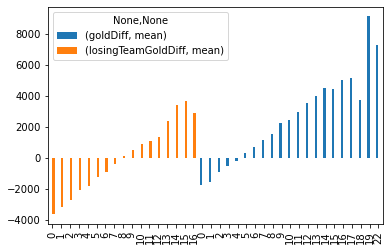

In [22]:
#looking at the relation between kills, this shows that men the wining team is down kills they arent losing as badly as the losing team
# is
df1 = df.groupby('losingteamKills').agg({'losingTeamGoldDiff': ['mean']})
df2 = df.groupby('kills').agg({'goldDiff': ['mean']})
frames = [df1,df2]
result = pd.concat(frames)
result.plot.bar()

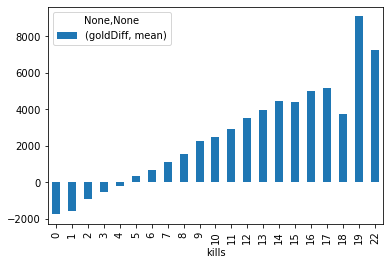

In [4]:
#looking to see how kills effect gold diffrence for the winining team
#This shows that there is a direct relation between kills and gold lead
df1 = df.groupby('kills').agg({'goldDiff': ['mean']}).plot(kind ='bar')

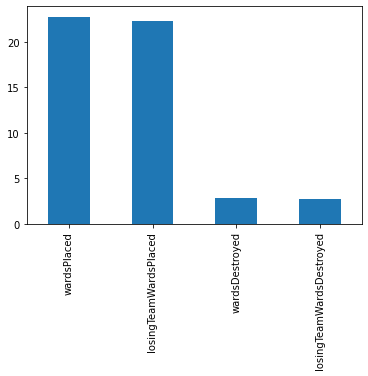

In [5]:
#Comparing averge wards, not much off a change. I think this shows that both teams are placeing and destroying
#similar amount of wards, with the wining team averaging one more ward a game
dfWard = df[['wardsPlaced', 'losingTeamWardsPlaced','wardsDestroyed','losingTeamWardsDestroyed']]
dfWard = dfWard.mean().plot(kind = 'bar')

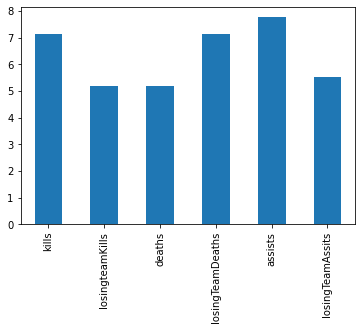

In [7]:
# A key factor to wining is having more kills than your oppoonent, as well as having less deaths and having more assists with differenct in mean assists being the biggest difference between teams
dfKills = df[['kills','losingteamKills','deaths','losingTeamDeaths','assists', 'losingTeamAssits']]
dfKills = dfKills.mean().plot(kind = 'bar')